# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#Display the data:
mouse_metadata.head()


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [201]:
# Read the study results
study_results = pd.read_csv(study_results_path)

#Display the data:
study_results.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [202]:
# Combine the data into a single DataFrame

combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [203]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [204]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated()==True]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
137  Female          21          26

In [205]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df["Mouse ID"]=="g989"]



Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [206]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=combined_df[combined_df["Mouse ID"]!="g989"]



In [207]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe["Mouse ID"].nunique()


248

## Summary Statistics

In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standarddev=clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standarderr=clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({"Mean Tumor Vol":mean, 
                        "Median Tumor Vol":median,
                        "Variance Tumor Vol":variance,
                        "Standard Dev Tumor Vol":standarddev,
                        "Standard Err Tumor Vol":standarderr})

summary_df

Mean Tumor Vol  Median Tumor Vol  Variance Tumor Vol  \
Drug Regimen                                                         
Capomulin          40.675741         41.557809           24.947764   
Ceftamin           52.591172         51.776157           39.290177   
Infubinol          52.884795         51.820584           43.128684   
Ketapril           55.235638         53.698743           68.553577   
Naftisol           54.331565         52.509285           66.173479   
Placebo            54.033581         52.288934           61.168083   
Propriva           52.320930         50.446266           43.852013   
Ramicane           40.216745         40.673236           23.486704   
Stelasyn           54.233149         52.431737           59.450562   
Zoniferol          53.236507         51.818479           48.533355   

              Standard Dev Tumor Vol  Standard Err Tumor Vol  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [209]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summarytable=clean_dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summarytable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

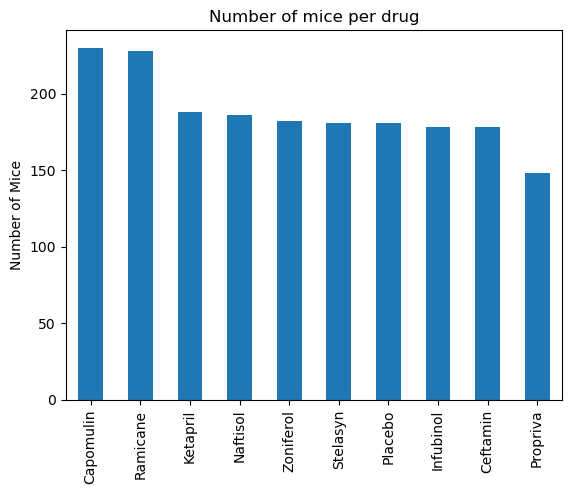

In [210]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count=clean_dataframe["Drug Regimen"].value_counts()
mouse_count.plot(kind="bar", ylabel="Number of Mice", title="Number of mice per drug")

plt.savefig("pandasbarfig.png")
plt.show()


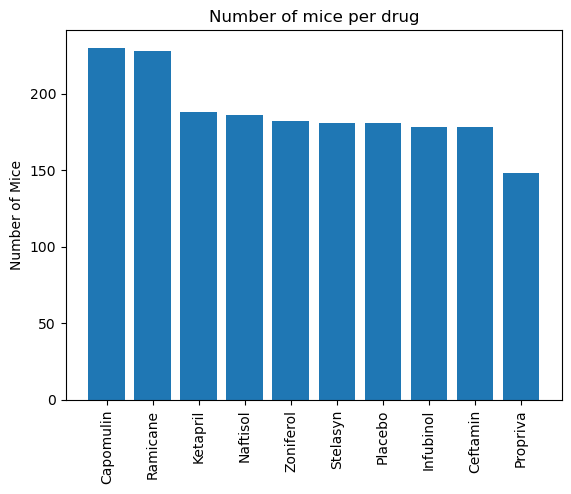

In [211]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_count.index.values, mouse_count.values)
plt.ylabel("Number of Mice")
plt.title("Number of mice per drug")
plt.xticks(rotation=90)

plt.savefig("pltbar.png")
plt.show()

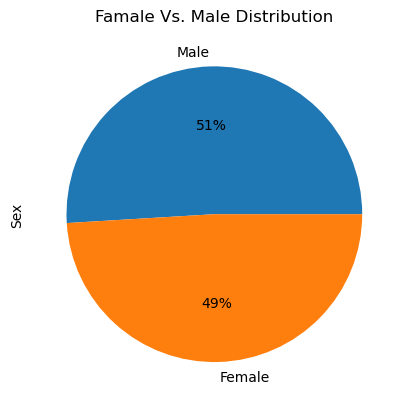

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_dataframe["Sex"].value_counts()
sex_data.plot(kind="pie", ylabel="Sex", autopct="%1.0f%%", title="Famale Vs. Male Distribution")

plt.savefig("pandaspie.png")
plt.show()



## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_dataframe.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_tp, clean_dataframe, on=['Mouse ID', 'Timepoint'], how = 'left')
tumor_volume




Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [214]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_regimen = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment]
    tumor_vol = tumor_regimen["Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
  # Determine outliers
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    


Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


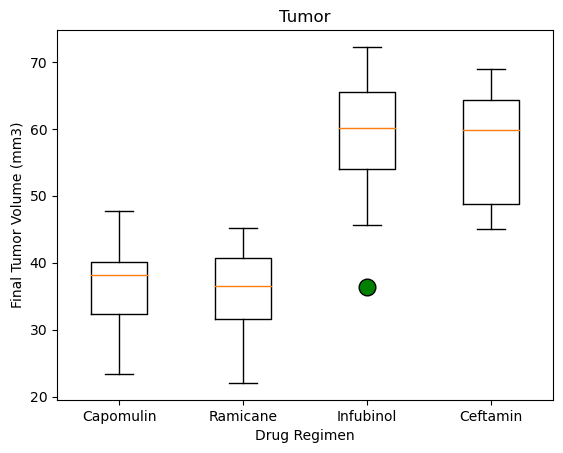

<Figure size 640x480 with 0 Axes>

In [215]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

flierprops = dict(marker='o', markerfacecolor='g', markersize=12,
                  linestyle='none')
fig1, ax = plt.subplots()

ax.set_title('Tumor')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

ax.boxplot(tumor_vol_data, flierprops = flierprops, labels = Drug)
plt.show()

plt.savefig("boxplot")
plt.show()


## Line and Scatter Plots

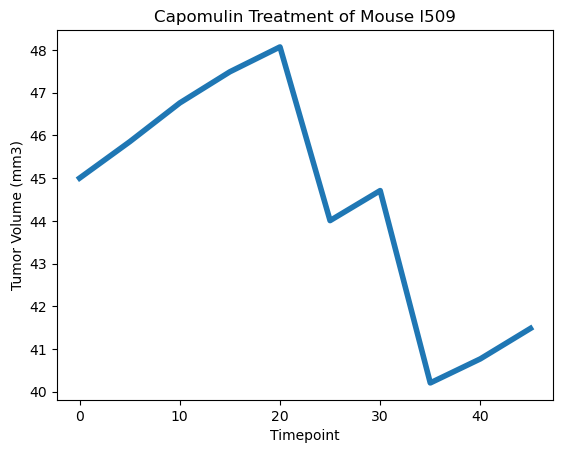

In [216]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot = clean_dataframe.loc[clean_dataframe["Mouse ID"] == "l509",:]
line_plot

xline = line_plot["Timepoint"]
tumor_size = line_plot["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment of Mouse l509")

plt.plot(xline, tumor_size, linewidth=4, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('lineplot')
plt.show()


C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_18428\770368725.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_aver = capomulin_reg.groupby(["Mouse ID"]).mean()


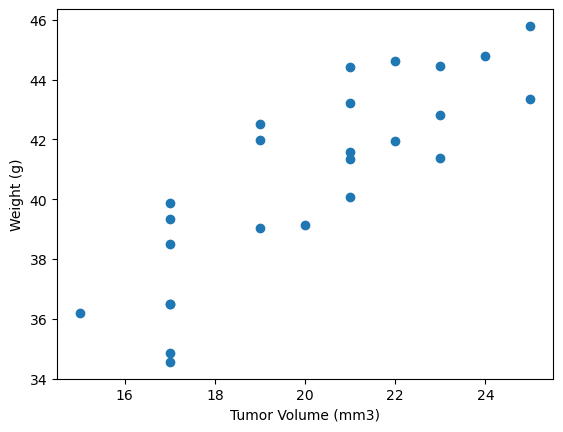

In [217]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_reg = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin",:]

# Average
capomulin_aver = capomulin_reg.groupby(["Mouse ID"]).mean()
mouse_w = capomulin_reg.groupby('Mouse ID')['Weight (g)'].mean()

#Scatter plot
plt.scatter(capomulin_aver["Weight (g)"], capomulin_aver["Tumor Volume (mm3)"])
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

the correlation coefficient between Weight (g) and Tumor Volume (mm3) is 0.84


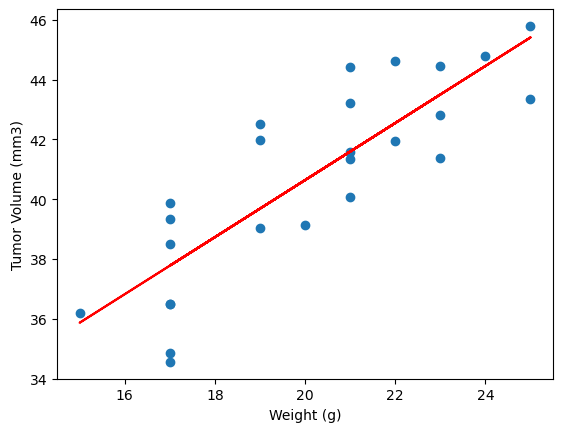

In [222]:
# Calculate the correlation coefficient and a linear regression model 
correlation = round(st.pearsonr(capomulin_aver["Weight (g)"], capomulin_aver["Tumor Volume (mm3)"])[0],2)
print(f"the correlation coefficient between Weight (g) and Tumor Volume (mm3) is {correlation}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

xvalues = capomulin_aver["Weight (g)"]
yvalues = capomulin_aver["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
reg_val = xvalues * slope + intercept
line_eq = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(xvalues, yvalues)
plt.plot(xvalues, reg_val, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('linearregression')
plt.show()
                                                                            
                                        
